In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from comparison_functions import markdown_table
from IPython.display import Markdown
md = lambda x: display(Markdown(x))


In [3]:
import pandas as pd

import dill as pickle
import sys
from bakir.common import fasta_from_seq
output_path = None

sys.path.insert(0, 'bakir/src/bakir/')

with open('bakir/src/bakir/data/kir_db.pickle', 'rb') as f:
    anno = pickle.load(f)
db = anno[0]

In [4]:
from comparison_functions import compare_bakir_immunanot, group_annotations_by_gene, group_annotations_by_gene_immunanot, load_bakir_data, extract_immunannot_gene_features, load_and_convert_bed

In [5]:
from glob import glob
import os
import pandas as pd

# Initialize a dictionary to store DataFrames
dfs = {}

for assembly in glob("HPRC-assemblies-annotations/*/*.*.f1_assembly_v2.yaml"):
    bakir = load_bakir_data(assembly)
    imm_prefix = os.path.basename(assembly).split('.f1')[0]
    immunanot = extract_immunannot_gene_features(f'HPRC-Immunanot-annotations/{imm_prefix}/{imm_prefix}.gtf.gz')
    df = compare_bakir_immunanot(bakir, immunanot)
    
    # Store the DataFrame in the dictionary with imm_prefix as the key
    dfs[imm_prefix] = df


In [6]:
# Combine all DataFrames from the dictionary into a single DataFrame
all_dfs = pd.concat(dfs.values(), ignore_index=True)

# Convert columns to appropriate types for aggregation
all_dfs['kir_annots copies'] = pd.to_numeric(all_dfs['kir_annots copies'], errors='coerce')
all_dfs['imm_annots copies'] = pd.to_numeric(all_dfs['imm_annots copies'], errors='coerce')
all_dfs['num position diffs'] = pd.to_numeric(all_dfs['num position diffs'], errors='coerce')
all_dfs['num strand diffs'] = pd.to_numeric(all_dfs['num strand diffs'], errors='coerce')
all_dfs['num allele call diffs'] = pd.to_numeric(all_dfs['num allele call diffs'], errors='coerce')

# Ensure NaNs from coercion are treated as 0 for summing
all_dfs.fillna(0, inplace=True)

# First, compute the sums directly
sums = all_dfs.groupby('gene').agg({
    'kir_annots copies': 'sum',
    'imm_annots copies': 'sum',
    'num position diffs': 'sum',
    'num strand diffs': 'sum',
    'num allele call diffs': 'sum'
})

# Combine the sums with the count of differing copies
summary = sums
summary['num allele call diffs'] = summary['num allele call diffs'].astype(int)



In [7]:
paper_i_summary = summary.copy().drop(['num position diffs', 'num strand diffs'], axis='columns')

In [8]:
paper_i_summary['Allele concordance Immunannot'] = ((1-(paper_i_summary['num allele call diffs'] / paper_i_summary['kir_annots copies'])) * 100).apply(round)

In [9]:
paper_i_summary = paper_i_summary.rename({'kir_annots copies': 'BAKIR copies', 'imm_annots copies': 'Immuannot copies', 'num allele call diffs': 'Immuannot allele diff'}, axis='columns')

In [10]:
from glob import glob
import os
import pandas as pd
from comparison_functions import load_skirt_data

# Initialize a dictionary to store DataFrames
dfs_s = {}

for assembly in glob("HPRC-assemblies-annotations/*/*.*.f1_assembly_v2.yaml"):
    bakir = load_bakir_data(assembly)
    sample_prefix = os.path.basename(assembly).split('.f1')[0]
    skirt = load_skirt_data(glob(f'HPRC-Skirt-annotations//{sample_prefix}/{sample_prefix}*allele.csv')[0])
    df = compare_bakir_immunanot(bakir, skirt)
    
    # Store the DataFrame in the dictionary with imm_prefix as the key
    dfs_s[sample_prefix] = df


In [11]:
# Combine all DataFrames from the dictionary into a single DataFrame
all_dfs = pd.concat(dfs_s.values(), ignore_index=True)

# Convert columns to appropriate types for aggregation
all_dfs['kir_annots copies'] = pd.to_numeric(all_dfs['kir_annots copies'], errors='coerce')
all_dfs['imm_annots copies'] = pd.to_numeric(all_dfs['imm_annots copies'], errors='coerce')
all_dfs['num position diffs'] = pd.to_numeric(all_dfs['num position diffs'], errors='coerce')
all_dfs['num strand diffs'] = pd.to_numeric(all_dfs['num strand diffs'], errors='coerce')
all_dfs['num allele call diffs'] = pd.to_numeric(all_dfs['num allele call diffs'], errors='coerce')

# Ensure NaNs from coercion are treated as 0 for summing
all_dfs.fillna(0, inplace=True)

# First, compute the sums directly
sums = all_dfs.groupby('gene').agg({
    'kir_annots copies': 'sum',
    'imm_annots copies': 'sum',
    'num position diffs': 'sum',
    'num strand diffs': 'sum',
    'num allele call diffs': 'sum'
})

# Combine the sums with the count of differing copies
summary = sums
summary['num allele call diffs'] = summary['num allele call diffs'].astype(int)



In [12]:
paper_s_summary = summary.copy().drop(['num position diffs', 'num strand diffs'], axis='columns')

In [13]:
summary

,kir_annots copies,imm_annots copies,num position diffs,num strand diffs,num allele call diffs
gene,,,,,
KIR2DL1,46,46,46,0,4
KIR2DL2,12,12,12,0,2
KIR2DL3,40,40,40,0,5
KIR2DL4,53,53,53,0,1
KIR2DL5A,7,7,7,0,0
KIR2DL5B,8,8,8,0,0
KIR2DP1,47,47,47,0,6
KIR2DS1,9,9,9,0,1
KIR2DS2,10,10,10,0,1


In [14]:
paper_s_summary['Allele concordance SKIRT'] = ((1-(paper_s_summary['num allele call diffs'] / paper_s_summary['kir_annots copies'])) * 100).apply(round)

In [15]:
paper_s_summary = paper_s_summary.rename({'kir_annots copies': 'BAKIR copies', 'imm_annots copies': 'SKIRT copies', 'num allele call diffs':'SKIRT allele diff'}, axis='columns')

In [16]:
paper_s_summary

,BAKIR copies,SKIRT copies,SKIRT allele diff,Allele concordance SKIRT
gene,,,,
KIR2DL1,46,46,4,91
KIR2DL2,12,12,2,83
KIR2DL3,40,40,5,88
KIR2DL4,53,53,1,98
KIR2DL5A,7,7,0,100
KIR2DL5B,8,8,0,100
KIR2DP1,47,47,6,87
KIR2DS1,9,9,1,89
KIR2DS2,10,10,1,90


In [17]:
paper_summary = paper_i_summary.merge(paper_s_summary.drop(['BAKIR copies'], axis='columns'), left_index=True, right_index=True)

In [18]:
sum_row = paper_summary.sum(numeric_only=True).to_frame().T
mean_row = paper_summary.mean(numeric_only=True).to_frame().T

df_with_sum_and_mean = pd.concat([paper_summary, sum_row, mean_row], ignore_index=True)
df_with_sum_and_mean.index = list(paper_summary.index) + ['Sum', 'Mean']
df_with_sum_and_mean

,BAKIR copies,Immuannot copies,Immuannot allele diff,Allele concordance Immunannot,SKIRT copies,SKIRT allele diff,Allele concordance SKIRT
KIR2DL1,46.000000,46.000000,1.000000,98.000000,46.000000,4.000000,91.000000
KIR2DL2,12.000000,12.000000,0.000000,100.000000,12.000000,2.000000,83.000000
KIR2DL3,40.000000,40.000000,0.000000,100.000000,40.000000,5.000000,88.000000
KIR2DL4,53.000000,53.000000,5.000000,91.000000,53.000000,1.000000,98.000000
KIR2DL5A,7.000000,7.000000,0.000000,100.000000,7.000000,0.000000,100.000000
KIR2DL5B,8.000000,8.000000,4.000000,50.000000,8.000000,0.000000,100.000000
KIR2DP1,47.000000,47.000000,6.000000,87.000000,47.000000,6.000000,87.000000
KIR2DS1,9.000000,9.000000,0.000000,100.000000,9.000000,1.000000,89.000000
KIR2DS2,10.000000,10.000000,0.000000,100.000000,10.000000,1.000000,90.000000
KIR2DS3,6.000000,6.000000,1.000000,83.000000,6.000000,0.000000,100.000000


In [19]:
paper_summary

,BAKIR copies,Immuannot copies,Immuannot allele diff,Allele concordance Immunannot,SKIRT copies,SKIRT allele diff,Allele concordance SKIRT
gene,,,,,,,
KIR2DL1,46,46,1,98,46,4,91
KIR2DL2,12,12,0,100,12,2,83
KIR2DL3,40,40,0,100,40,5,88
KIR2DL4,53,53,5,91,53,1,98
KIR2DL5A,7,7,0,100,7,0,100
KIR2DL5B,8,8,4,50,8,0,100
KIR2DP1,47,47,6,87,47,6,87
KIR2DS1,9,9,0,100,9,1,89
KIR2DS2,10,10,0,100,10,1,90


In [20]:
print(paper_summary.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
 & BAKIR copies & Immuannot copies & Immuannot allele diff & Allele concordance Immunannot & SKIRT copies & SKIRT allele diff & Allele concordance SKIRT \\
gene &  &  &  &  &  &  &  \\
\midrule
KIR2DL1 & 46 & 46 & 1 & 98 & 46 & 4 & 91 \\
KIR2DL2 & 12 & 12 & 0 & 100 & 12 & 2 & 83 \\
KIR2DL3 & 40 & 40 & 0 & 100 & 40 & 5 & 88 \\
KIR2DL4 & 53 & 53 & 5 & 91 & 53 & 1 & 98 \\
KIR2DL5A & 7 & 7 & 0 & 100 & 7 & 0 & 100 \\
KIR2DL5B & 8 & 8 & 4 & 50 & 8 & 0 & 100 \\
KIR2DP1 & 47 & 47 & 6 & 87 & 47 & 6 & 87 \\
KIR2DS1 & 9 & 9 & 0 & 100 & 9 & 1 & 89 \\
KIR2DS2 & 10 & 10 & 0 & 100 & 10 & 1 & 90 \\
KIR2DS3 & 6 & 6 & 1 & 83 & 6 & 0 & 100 \\
KIR2DS4 & 43 & 42 & 0 & 100 & 43 & 0 & 100 \\
KIR2DS5 & 9 & 9 & 0 & 100 & 9 & 1 & 89 \\
KIR3DL1 & 43 & 43 & 2 & 95 & 43 & 0 & 100 \\
KIR3DL2 & 50 & 50 & 17 & 66 & 50 & 0 & 100 \\
KIR3DL3 & 52 & 52 & 15 & 71 & 52 & 3 & 94 \\
KIR3DP1 & 53 & 53 & 5 & 91 & 53 & 4 & 92 \\
KIR3DS1 & 10 & 10 & 0 & 100 & 10 & 0 & 100 \\
\bottomrule
\end{ta

In [21]:
paper_summary = paper_summary.reset_index()

In [22]:
paper_summary.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          17 non-null     int64 
 1   gene                           17 non-null     object
 2   BAKIR copies                   17 non-null     int64 
 3   Immuannot copies               17 non-null     int64 
 4   Immuannot allele diff          17 non-null     int64 
 5   Allele concordance Immunannot  17 non-null     int64 
 6   SKIRT copies                   17 non-null     int64 
 7   SKIRT allele diff              17 non-null     int64 
 8   Allele concordance SKIRT       17 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.3+ KB


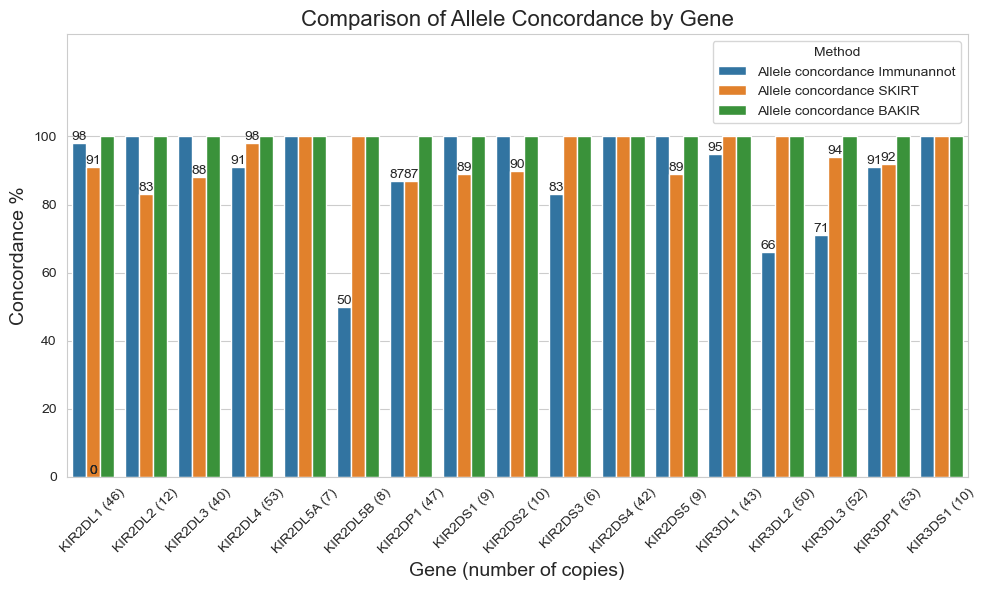

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Assuming 'paper_summary' is your DataFrame

# Step 3: Add a count value to gene labels
# Calculate the minimum count value
paper_summary['Min Copies'] = paper_summary[['BAKIR copies', 'Immuannot copies', 'SKIRT copies']].min(axis=1)
# Create a new column for modified gene labels
paper_summary['Gene Label'] = paper_summary.apply(lambda x: f"{x['gene']} ({x['Min Copies']})", axis=1)

# Add the new category with a constant value of 100
paper_summary['Allele concordance BAKIR'] = 100

# Transform the DataFrame to long format for plotting
paper_summary_long = pd.melt(paper_summary, 
                             id_vars=['Gene Label'], 
                             value_vars=['Allele concordance Immunannot', 'Allele concordance SKIRT', 'Allele concordance BAKIR'],
                             var_name='Method', 
                             value_name='Concordance %')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Customize the size as needed
sns.barplot(x='Gene Label', y='Concordance %', hue='Method', data=paper_summary_long, ax=ax)

# Customizations
ax.set_xlabel('Gene')  # X-axis Label
ax.set_ylabel('Concordance %')  # Y-axis Label
ax.set_title('Allele Concordance by Gene')  # Title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

for bar in ax.patches:
    # Get the bar's height, width, and position
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height
    if height < 100:
        # Use ax.text to add the text above the bar
        # You can adjust the vertical alignment and position to better fit your aesthetics
        ax.text(x, y, f'{round(height)}', ha='center', va='bottom')


# Step 1: Add grey grid in the background
# ax.grid(True)  # Add grid

# Step 2: Adjust the y-axis
ax.set_ylim(0, 130)  # Increase y-axis limit to make room for legend (ticks not going past 100)
y_ticks = [0, 20, 40, 60, 80, 100]  # Adjust this list based on your needs
ax.set_yticks(y_ticks)

ax.set_xlabel('Gene (number of copies)', fontsize=14)
ax.set_ylabel('Concordance %', fontsize=14)  # Increase y-axis label size

ax.set_title('Comparison of Allele Concordance by Gene', fontsize=16)

plt.legend(title='Method', loc='upper right')  # Move legend to the top right

plt.tight_layout()  # Adjust layout to not cut off elements
plt.show()

fig.savefig('gene_allele_comparison.png', dpi=350)


In [24]:
summary['kir_annots copies'].sum()

498

In [25]:
summary['imm_annots copies'].sum()

498

In [26]:
summary['num allele call diffs'].sum()

28

## Make example case figure

In [27]:
from comparison_functions import make_annotation_matches, group_annotations_by_gene, view_alignment, analyze_sample_gene_discordance

for k in dfs:
    diff_cnv = dfs[k][dfs[k]['kir_annots copies'] != dfs[k]['imm_annots copies']]
    diff_a = dfs[k][dfs[k]['num allele call diffs'] > 0]
    
    genes = list(diff_cnv['gene']) + list(diff_a['gene'])
    if genes:
        for g in genes:
            if not (k == 'HG02630.maternal' and g == 'KIR2DL4'):
                continue
            md(f"### {k} - {g}")
            display(dfs[k][dfs[k]['gene'] == g])
            closest_alleles, v, fv = analyze_sample_gene_discordance(k, g, db)
            b = True

### HG02630.maternal - KIR2DL4

,gene,kir_annots copies,imm_annots copies,num position diffs,num strand diffs,position diffs,num allele call diffs,allele diffs
3,KIR2DL4,1,1,0,0,[],1.0,"[(01201, 0050101)]"


#### Discordant alleles: KA = 01201, Immunanot = 0050101

Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp57jd1pfr -OUTFILE=/tmp/tmp32gfu8al -OUTPUT=CLUSTAL


Saving plot as PNG to None


Bokeh(figure)

,closest allele,common mut,new mut,missing mut,missing functional mut,new functional mut,jaccard functional distance,jaccard distance,MSA edit distance
0,KIR2DL4*01201,5,44,0,{},{},0.00000,0.897959,86
1,KIR2DL4*0050101,31,18,9,{},"{(10521, C>G)}",0.00813,0.465517,23


In [28]:
from comparison_functions import latex_table

latex_table(('Tool', 
             'Allele call', 
             'Global Edit distance', 
             'Assembly missing F variants', 
             'Assembly new F variants', 
             'Hamming functional distance'),
            [('KIR-Annotator', 'KIR2DL4*01201', 86, None, None, 0.00),
            ('Immunannot', 'KIR2DL4*0050101', 23, '(10521, C>G)', None, 0.00813)])

\hline
Tool                 & Allele call          & Global Edit distance & Assembly missing F variants & Assembly new F variants & Hamming functional distance\\
\hline
KIR-Annotator        & KIR2DL4*01201        & 86                   & None                 & None                 & 0.0                 \\
Immunannot           & KIR2DL4*0050101      & 23                   & (10521, C>G)         & None                 & 0.00813             \\
\hline


In [29]:
s = 0
for var in v:
    if var in db['KIR2DL4'].alleles['01201'].mutations:
        continue
    if '>' in var[1]:
        s += 1
    else:
        s += len(var[1][3:])
print(s)

86


## Make supplementary comparison table

In [30]:
from glob import glob
import os
import pandas as pd
from comparison_functions import load_skirt_data

# Initialize a dictionary to store DataFrames
dfs_s = {}

for assembly in glob("HPRC-assemblies-annotations/*/*.*.f1_assembly_v2.yaml"):
    bakir = load_bakir_data(assembly)
    sample_prefix = os.path.basename(assembly).split('.f1')[0]
    skirt = load_skirt_data(glob(f'HPRC-Skirt-annotations/{sample_prefix}/{sample_prefix}*allele.csv')[0])
    df = compare_bakir_immunanot(bakir, skirt)
    
    # Store the DataFrame in the dictionary with imm_prefix as the key
    dfs_s[sample_prefix] = df


In [31]:
from comparison_functions import make_annotation_matches, group_annotations_by_gene, view_alignment, analyze_sample_gene_discordance, analyze_discordant_alleles, get_bakir_data
from collections import OrderedDict

all_data = []

for k in dfs:
    diff_cnv_i = dfs[k][dfs[k]['kir_annots copies'] != dfs[k]['imm_annots copies']]
    diff_a_i = dfs[k][dfs[k]['num allele call diffs'] > 0]
    
    diff_cnv_s = dfs_s[k][dfs[k]['kir_annots copies'] != dfs_s[k]['imm_annots copies']]
    diff_a_s = dfs_s[k][dfs[k]['num allele call diffs'] > 0]

    
    genes = set(list(diff_cnv_i['gene']) + list(diff_a_i['gene']) + list(diff_cnv_s['gene']) + list(diff_a_s['gene']))
    if genes:
        for g in genes:
            sample = k.split('.')[0]

            haplo = k
            ka_geno = get_bakir_data(sample, haplo)

            ka_geno = group_annotations_by_gene(ka_geno)[g]

            alt_i = group_annotations_by_gene_immunanot(extract_immunannot_gene_features(f'HPRC-Immunanot-annotations/{haplo}/{haplo}.gtf.gz'))[g]
            alt_s = group_annotations_by_gene_immunanot(load_skirt_data(glob(f'HPRC-Skirt-annotations/{haplo}/{haplo}*allele.csv')[0]))[g]
            
            
            match_indexes, anno_matches_i, extra_kir_i, extra_imm = make_annotation_matches(ka_geno, alt_i)
            match_indexes, anno_matches_s, extra_kir_s, extra_imm = make_annotation_matches(ka_geno, alt_s)

            
            # for c in set(extra_kir_i+extra_kir_s):
                # md("#### Extra KA copy, showing:")
                # analyze_extra_copy(ka_geno[c], db)

            for ka_anno, im_anno in anno_matches_i:
                ka_allele = ka_anno['closest allele'].split('*')[1][:3]
                im_allele = im_anno['template_allele'].split('*')[1][:3]
                
                s_anno = [x[1] for x in anno_matches_s if ka_anno == x[0]][0]
                s_allele = s_anno['template_allele'].split('*')[1][:3]
                
                if ka_allele == im_allele and im_allele == s_allele:
                    continue
                
                data = OrderedDict([('sample', sample),
                                    ('haplotype', k.split('.')[1]),
                                    ('contig', ka_anno['reference']),
                                    ('BAKIR allele', ka_anno['closest allele']),
                                    ('BAKIR positions', (ka_anno['start'], ka_anno['end']))])
                
                if ka_allele != im_allele:
                    closest_alleles_i, v, fv = analyze_discordant_alleles(ka_anno, im_anno, db=db, display_table=False)
                    closest_alleles_i = closest_alleles_i.set_index('closest allele')
                
                closest_alleles_s_f = False
                if s_allele != im_allele:
                    closest_alleles_s, v, fv = analyze_discordant_alleles(ka_anno, s_anno, db=db, display_table=False)
                    closest_alleles_s = closest_alleles_s.set_index('closest allele')
                    closest_alleles_s_f = True
                    
                if closest_alleles_s_f:
                    closest_alleles = pd.concat([closest_alleles_i, closest_alleles_s])
                    closest_alleles = closest_alleles.reset_index().drop_duplicates(subset='closest allele').set_index('closest allele')
                else:
                    closest_alleles = closest_alleles_i


                data[f'BAKIR global edit distance'] = closest_alleles.loc[ka_anno['closest allele']]['MSA edit distance']
                data[f'BAKIR core jaccard distance'] = closest_alleles.loc[ka_anno['closest allele']]['jaccard functional distance']
                data[f'BAKIR missing core variants'] = closest_alleles.loc[ka_anno['closest allele']]['missing functional mut']
                data[f'BAKIR new core variants'] = closest_alleles.loc[ka_anno['closest allele']]['new functional mut']


                for l, an in zip(['Immunannot', 'SKIRT'], [im_anno, s_anno]):
                    allele = g+'*'+an['template_allele'].split('*')[1][:3]
                    data[f'{l} allele'] = an['template_allele']
                    data[f'{l} positions'] = (an['start'], an['end'])
                    data[f'{l} global edit distance'] = closest_alleles.loc[an['template_allele']]['MSA edit distance']
                    data[f'{l} core jaccard distance'] = closest_alleles.loc[an['template_allele']]['jaccard functional distance']
                    data[f'{l} missing core variants'] = closest_alleles.loc[an['template_allele']]['missing functional mut']
                    data[f'{l} new core variants'] = closest_alleles.loc[an['template_allele']]['new functional mut']
                all_data.append(data)

Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmprahu2d6g -OUTFILE=/tmp/tmpaq5b2tl2 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpl_ltpu8n -OUTFILE=/tmp/tmpr659gq9r -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmprgqv3ee1 -OUTFILE=/tmp/tmpnlfuqv9y -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpk_nh4_wt -OUTFILE=/tmp/tmpfb16cdgv -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmprg0wpk75 -OUTFILE=/tmp/tmpduacb2m0 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmph82shjp1 -OUTFILE=/tmp/tmphb50q78n -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmptimx4k3s -OUTFILE=/tmp/tmpcedk9mbd -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp0zcqeffz -OUTFILE=/tmp/tmpaflehu7h -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp_5x7xk8z -OUTFILE=/tmp/tmpnjf_qkva -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpqrvdnexc -OUTFILE=/tmp/tmpls5q0ksa -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp_qg8e0pl -OUTFILE=/tmp/tmpv668ufmy -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpn4ens9_2 -OUTFILE=/tmp/tmpucgyskpm -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpfkx_cupt -OUTFILE=/tmp/tmpw2zvy9m3 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpb8a1wipk -OUTFILE=/tmp/tmpf6t2osf8 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp2ka71khd -OUTFILE=/tmp/tmpastw10ws -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp15cg848m -OUTFILE=/tmp/tmpb88erpbv -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp4rmmhxc0 -OUTFILE=/tmp/tmpoyfwhkdf -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpo8ky1vzm -OUTFILE=/tmp/tmpt1dhl785 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpc2_j3_bm -OUTFILE=/tmp/tmp87b8kjvo -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmplu7t679s -OUTFILE=/tmp/tmpgkba2vvg -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpxdmp43ec -OUTFILE=/tmp/tmpy0065w_6 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpjzvaglku -OUTFILE=/tmp/tmpmqo4d17o -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpu06goq__ -OUTFILE=/tmp/tmpxo5z5h2c -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpfxkyxfuk -OUTFILE=/tmp/tmpmea6nblu -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpycl2gao6 -OUTFILE=/tmp/tmpg_d4x7o_ -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpyo34mkzj -OUTFILE=/tmp/tmpj4hq5p85 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpqx3hem43 -OUTFILE=/tmp/tmpvv5udqif -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpd861ggj0 -OUTFILE=/tmp/tmpguto1v50 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpdgj_ta2a -OUTFILE=/tmp/tmphfzia_8h -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpr9259rq2 -OUTFILE=/tmp/tmpv3o55zwk -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp3z4yu640 -OUTFILE=/tmp/tmpfby309ek -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmplhk9cde9 -OUTFILE=/tmp/tmpkgjdmvn1 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp47b93gfr -OUTFILE=/tmp/tmpuo4icniy -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp6gav9bc0 -OUTFILE=/tmp/tmpvclf45tv -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpj5xyjny3 -OUTFILE=/tmp/tmpmfmfspkc -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpusbrb6z3 -OUTFILE=/tmp/tmpqphf7rjf -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmphp_dnz_z -OUTFILE=/tmp/tmpoq19mjyr -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp9vnyi7r_ -OUTFILE=/tmp/tmp2pgirw_7 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpjd0a8hj4 -OUTFILE=/tmp/tmp__6fxgk9 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpq6k6bxsy -OUTFILE=/tmp/tmp8spj879m -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpsenb0k3v -OUTFILE=/tmp/tmpql09f3x8 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmptts114rx -OUTFILE=/tmp/tmpfo5uhfvd -OUTPUT=CLUSTAL


2024-04-30 17:00:20,852 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5550 T>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:00:20,853 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5528 G>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:00:20,854 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 1868 C>G on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpsrjv7hyh -OUTFILE=/tmp/tmpfup4c44o -OUTPUT=CLUSTAL


2024-04-30 17:00:27,413 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5550 T>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:00:27,414 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5528 G>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:00:27,415 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 1868 C>G on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpgmnzrz2v -OUTFILE=/tmp/tmpit69a261 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpumme8upg -OUTFILE=/tmp/tmpswbsbwlc -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp4okngldr -OUTFILE=/tmp/tmp_7f1k_wo -OUTPUT=CLUSTAL


2024-04-30 17:03:42,413 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,415 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 9181 G>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,415 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 4023 C>T on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,417 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3977 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,418 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 2379 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,419 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,420 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,421 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 2350 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,422 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12505 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,423 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3972 G>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,424 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3992 T>C on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,425 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12599 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:03:42,426 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3978 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp1yfi0yj1 -OUTFILE=/tmp/tmp4v7q57l6 -OUTPUT=CLUSTAL


2024-04-30 17:04:38,839 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,840 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 9181 G>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,841 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 4023 C>T on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,842 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3977 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,842 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 2379 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,843 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,844 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,845 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 2350 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,846 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12505 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,848 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3972 G>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,849 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3992 T>C on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,850 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12599 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:04:38,851 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3978 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpqs_o357j -OUTFILE=/tmp/tmp0lg93n9s -OUTPUT=CLUSTAL


2024-04-30 17:05:33,693 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5550 T>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:05:33,694 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 282 G>A on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:05:33,695 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 1080 A>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpi4_fsjtj -OUTFILE=/tmp/tmp356qw6mp -OUTPUT=CLUSTAL


2024-04-30 17:05:44,501 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5550 T>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:05:44,502 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 282 G>A on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:05:44,503 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 1080 A>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpo88zn7fp -OUTFILE=/tmp/tmp9nby4pru -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpx7g7gs0t -OUTFILE=/tmp/tmp0cazx2gh -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmprurhbrvm -OUTFILE=/tmp/tmp0kvdphol -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpibbrut2p -OUTFILE=/tmp/tmpde622ktx -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpgx0b06e4 -OUTFILE=/tmp/tmpbzzzpd2z -OUTPUT=CLUSTAL


2024-04-30 17:10:44,412 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:10:44,414 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:10:44,415 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:10:44,416 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5923 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:10:44,417 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12534 C>T on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp45b6xpa4 -OUTFILE=/tmp/tmpxjtt6v2m -OUTPUT=CLUSTAL


2024-04-30 17:11:41,021 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:11:41,022 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:11:41,024 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:11:41,024 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5923 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:11:41,025 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12534 C>T on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpv6b5ia3i -OUTFILE=/tmp/tmpfwa1_35r -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpf721zmip -OUTFILE=/tmp/tmp9tn3bnqw -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpleqf0oaz -OUTFILE=/tmp/tmpdwt1cj94 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmppb40bv5l -OUTFILE=/tmp/tmpom2wbqp3 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpuzycwm0_ -OUTFILE=/tmp/tmpspconjmy -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpm2_3efzk -OUTFILE=/tmp/tmpilld66oi -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpxg3xl_n5 -OUTFILE=/tmp/tmplgvwdkyj -OUTPUT=CLUSTAL


2024-04-30 17:19:22,540 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5550 T>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:19:22,541 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5528 G>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:19:22,541 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 282 G>A on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp5hlz69gx -OUTFILE=/tmp/tmp9akunyp2 -OUTPUT=CLUSTAL


2024-04-30 17:19:33,514 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5550 T>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:19:33,515 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5528 G>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:19:33,516 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 282 G>A on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp9j2miuo0 -OUTFILE=/tmp/tmptanwwkni -OUTPUT=CLUSTAL


2024-04-30 17:19:45,364 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:19:45,365 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:19:45,366 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:19:45,367 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5923 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:19:45,368 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12534 C>T on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp8q3v_r0i -OUTFILE=/tmp/tmpzbn6ucqr -OUTPUT=CLUSTAL


2024-04-30 17:20:41,812 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:20:41,813 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:20:41,814 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:20:41,815 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5923 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:20:41,816 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12534 C>T on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpkky6tr9t -OUTFILE=/tmp/tmpvof8s_ei -OUTPUT=CLUSTAL


2024-04-30 17:21:36,986 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,987 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 9181 G>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,987 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 4023 C>T on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,988 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3977 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,989 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 2379 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,990 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,991 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,992 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 2350 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,993 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12505 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,994 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3972 G>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,994 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3992 T>C on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,995 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12599 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:21:36,996 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3978 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmprijomqmp -OUTFILE=/tmp/tmps4lqv6_m -OUTPUT=CLUSTAL


2024-04-30 17:22:33,238 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,240 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 9181 G>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,240 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 4023 C>T on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,241 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3977 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,242 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 2379 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,242 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,243 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,244 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 2350 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,245 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12505 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,245 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3972 G>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,246 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3992 T>C on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,247 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12599 C>A on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:22:33,247 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 3978 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp7y_491qz -OUTFILE=/tmp/tmpcwgmuy4k -OUTPUT=CLUSTAL


2024-04-30 17:23:27,749 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5550 T>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:23:27,750 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 282 G>A on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:23:27,750 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 1080 A>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmppzhzo8tk -OUTFILE=/tmp/tmpllgfg5vg -OUTPUT=CLUSTAL


2024-04-30 17:23:38,563 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5550 T>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:23:38,564 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 282 G>A on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:23:38,565 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 1080 A>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp44b51fm8 -OUTFILE=/tmp/tmphrc_igdn -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp15kshv11 -OUTFILE=/tmp/tmpggp8x6q2 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp7umsqaly -OUTFILE=/tmp/tmpf_pu6fir -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpzpnflk5o -OUTFILE=/tmp/tmpw3fjtqx2 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpk4k1w1x1 -OUTFILE=/tmp/tmpsn5oq5s6 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpsio9h6a4 -OUTFILE=/tmp/tmpzfv2f6m7 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmppis6_fsg -OUTFILE=/tmp/tmp9bgfw6xe -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmphvbtyprz -OUTFILE=/tmp/tmp4b_vnho1 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpb31605a4 -OUTFILE=/tmp/tmpycc6fzgm -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpz2_okmx6 -OUTFILE=/tmp/tmp6oioes6_ -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp7ca1q02x -OUTFILE=/tmp/tmpty_n8c86 -OUTPUT=CLUSTAL


2024-04-30 17:36:44,640 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:36:44,641 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:36:44,642 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:36:44,643 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5685 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpokyarwm5 -OUTFILE=/tmp/tmph5_3z_v2 -OUTPUT=CLUSTAL


2024-04-30 17:38:12,935 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:38:12,936 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:38:12,937 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:38:12,937 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5685 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpjf7uwofz -OUTFILE=/tmp/tmp4ld8k9gb -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpfo8rpe27 -OUTFILE=/tmp/tmpg_okluk4 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp20vyagni -OUTFILE=/tmp/tmppqu6s19z -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpi_plkju_ -OUTFILE=/tmp/tmp75j75ult -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpep2jpm5f -OUTFILE=/tmp/tmpqjo11f1b -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpqw94l6gi -OUTFILE=/tmp/tmp65d0rzk3 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpbx25smcc -OUTFILE=/tmp/tmpsf2le158 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp27b36rv4 -OUTFILE=/tmp/tmpu0vbfn4i -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp4udreyck -OUTFILE=/tmp/tmpfjuq2fke -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp_5yoozk4 -OUTFILE=/tmp/tmp3p8bjux4 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp8x3upsn8 -OUTFILE=/tmp/tmpwfpejsie -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp_a7d_prt -OUTFILE=/tmp/tmpg1947o0z -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpmoxns3mp -OUTFILE=/tmp/tmpouyvoz0m -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpsa6xr80z -OUTFILE=/tmp/tmp2su4f_kz -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp2euqm29p -OUTFILE=/tmp/tmphcwe_0ra -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp06nupydi -OUTFILE=/tmp/tmp5czw15q0 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpr8w5u127 -OUTFILE=/tmp/tmpl2i_uv5g -OUTPUT=CLUSTAL


2024-04-30 17:58:06,360 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5550 T>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:58:06,361 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5528 G>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpdz71s2zo -OUTFILE=/tmp/tmp5whwgzge -OUTPUT=CLUSTAL


2024-04-30 17:58:12,865 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5550 T>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 17:58:12,866 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5528 G>C on wildtype KIR3DP1*001: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpmjae4vqn -OUTFILE=/tmp/tmpfrsprfpa -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpj0j_vko2 -OUTFILE=/tmp/tmpc1a98ma3 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpsb5k9_57 -OUTFILE=/tmp/tmpdoklvpxn -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp6wkvu0pc -OUTFILE=/tmp/tmp5dnu6a3r -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpbiu1voan -OUTFILE=/tmp/tmp5wj8axmk -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpihhxj39e -OUTFILE=/tmp/tmpktwortn1 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmps5c6d6vo -OUTFILE=/tmp/tmpgoz19yn8 -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpaqogvox2 -OUTFILE=/tmp/tmpod3vwr6y -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpt5zsh_mw -OUTFILE=/tmp/tmp6g0t749j -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp6ycudin3 -OUTFILE=/tmp/tmphn479y9r -OUTPUT=CLUSTAL


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp5qyf9qv4 -OUTFILE=/tmp/tmplbbcr2zs -OUTPUT=CLUSTAL


2024-04-30 18:08:12,861 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 18:08:12,862 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 18:08:12,863 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 18:08:12,865 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5685 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmp65mn5he1 -OUTFILE=/tmp/tmpch49qjbm -OUTPUT=CLUSTAL


2024-04-30 18:09:09,161 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5790 C>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 18:09:09,162 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 288 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 18:09:09,163 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 12340 T>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


2024-04-30 18:09:09,164 - root - WARNING - [alignment_variants.py:117] - Error translating sequence for variant 5685 A>G on wildtype KIR2DP1*0010201: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.


Running clustalw:
clustalw -align -type=dna -INFILE=/tmp/tmpd6ppqvsq -OUTFILE=/tmp/tmpuduhdrkn -OUTPUT=CLUSTAL


In [32]:
pd.DataFrame(all_data).to_csv('all_discordant_comparison.csv', index=False)